In [19]:

import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [20]:
import tensorflow as tf
import keras
def read_data(filename):
    """Parse problem specifications from the data file."""
    i=0
    data=[]
    data2=[]
    data3=[]
    with open(filename, "r") as f:
        # header
        for line in f:
            if i>0:
                iwp = line.strip().split(',')
                new_iwp = list(map(float, iwp))
                data.append(new_iwp[0])
                data2.append(new_iwp[1])  
            i+=1
                
        return data, data2
    
def sorting(X,Y):
    
    B=sorted(Y)

    A=[]
    for n in range(len(X)):
    
        for m in range(len(X)):
            if B[n]==Y[m]:

                A.append(X[m])
                break
    
    return A,B
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
filename = 'data-gp1.txt'
filename2 = 'data-gp2.txt'
x,y=read_data(filename)
y,x=sorting(y,x)
x_data = np.zeros((200,1))
y_data = np.zeros((200,1))
for i in range(200):
    x_data[i,0] = x[i]
    y_data[i,0]= y[i]
x_data = x_data.astype('float32')
y_data = y_data.astype('float32')
model = models.Sequential()
model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_dim=1))

model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

model.add(layers.Dense(1))

model.summary()

model.compile(optimizer='adam',
              loss=root_mean_squared_error
              )
callbacks = [keras.callbacks.EarlyStopping(monitor='loss',
                                           patience=500,verbose=1)]
history = model.fit(x_data,
                    y_data,
                    epochs=1000,
                    batch_size=5,callbacks=callbacks
                    )




Epoch 1/1000
40/40 [==============================] - 0s 1ms/step - loss: 27.7370
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 27.8909
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 26.9856
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 27.9370
Epoch 5/1000
40/40 [==============================] - 0s 1ms/step - loss: 26.4961
Epoch 6/1000
40/40 [==============================] - 0s 1ms/step - loss: 28.4836
Epoch 7/1000
40/40 [==============================] - 0s 1ms/step - loss: 28.1041
Epoch 8/1000
40/40 [==============================] - 0s 1ms/step - loss: 28.0348
Epoch 9/1000
40/40 [==============================] - 0s 1ms/step - loss: 28.0933
Epoch 10/1000
40/40 [==============================] - 0s 1ms/step - loss: 27.6960
Epoch 11/1000
40/40 [==============================] - 0s 1ms/step - loss: 28.2308
Epoch 12/1000
40/40 [==============================] - 0s 1ms/step - loss: 28.1708
Epoch 13/1000

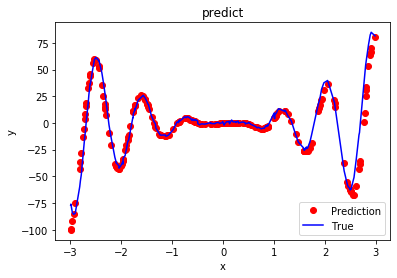

In [7]:
a=model.predict(x_data)


plt.plot(x,a, 'ro', label='Prediction')

plt.plot(x,y ,'b', label='True')
plt.title('predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

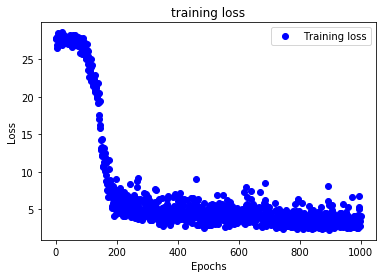

In [21]:
loss = history.history['loss']

epochs = range(1, 1001)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다

plt.title('training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

loss = history.history['loss']

epochs = range(1, 1001)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다

plt.title('training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
a,b=read_data(filename2)
b,a=sorting(b,a)
a_data = np.zeros((200,1))
b_data = np.zeros((200,1))
for i in range(200):
    a_data[i,0] = a[i]
    b_data[i,0]= b[i]
a_data = a_data.astype('float32')
b_data = b_data.astype('float32')
model = models.Sequential()
model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_dim=1))

model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

model.add(layers.Dense(1))



model.compile(optimizer='adam',
              loss=root_mean_squared_error
              )
callbacks = [keras.callbacks.EarlyStopping(monitor='loss',
                                           patience=500,verbose=1)]
history = model.fit(a_data,
                    b_data,
                    epochs=1000,
                    batch_size=5,callbacks=callbacks
                    )


Epoch 1/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.2203
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.2293
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.1051
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.2039
Epoch 5/1000
40/40 [==============================] - 0s 972us/step - loss: 4.1578
Epoch 6/1000
40/40 [==============================] - 0s 972us/step - loss: 4.2438
Epoch 7/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.1562
Epoch 8/1000
40/40 [==============================] - 0s 997us/step - loss: 4.1608
Epoch 9/1000
40/40 [==============================] - 0s 921us/step - loss: 4.1019
Epoch 10/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.2007
Epoch 11/1000
40/40 [==============================] - 0s 997us/step - loss: 4.1171
Epoch 12/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.0664
Epoch 13/1000
4

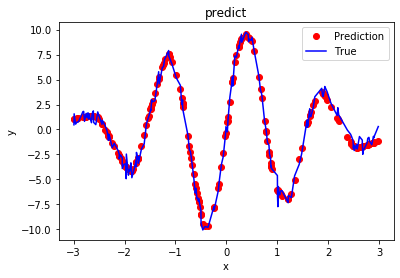

In [10]:
c=model.predict(a_data)


plt.plot(a,c, 'ro', label='Prediction')

plt.plot(a,b ,'b', label='True')
plt.title('predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

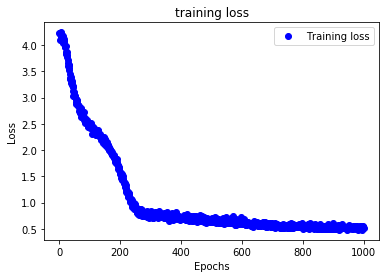

In [16]:

loss = history.history['loss']

epochs = range(1, 1001)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다

plt.title('training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_dim=1))

model.add(layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

model.add(layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
